In [1]:
import numpy as np
import pandas as pd 

In [2]:
#!pip install plotly  #No need for colab as it may already come with this pre-installed.

In [3]:
#Import plotting libraries. 
# Plotly can be useful for Choropleth, display of data on maps. 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [5]:
#Load the data into a pandas dataframe. 
df=pd.read_csv("/content/drive/MyDrive/Covid Analysis/country_vaccinations.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


Above, we see a lot of NaNs that we need to fill with some values, zeros make the most sense here. 

Let us check how many NaNs for each column. 

In [7]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     34800
people_vaccinated                      36755
people_fully_vaccinated                39521
daily_vaccinations_raw                 41795
daily_vaccinations                       363
total_vaccinations_per_hundred         34800
people_vaccinated_per_hundred          36755
people_fully_vaccinated_per_hundred    39521
daily_vaccinations_per_million           363
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [8]:
#Fill NaNs with 0 and then drop all countries with iso_code = 0. This is key information that we need so dropping unknowns is the best way to handle. 
df.fillna(0, inplace = True)
df.drop(df.index[df['iso_code'] == 0], inplace = True)

In [9]:
#Check how many nulls we have. SHould be none. 
df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73009 entries, 0 to 73008
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              73009 non-null  object 
 1   iso_code                             73009 non-null  object 
 2   date                                 73009 non-null  object 
 3   total_vaccinations                   73009 non-null  float64
 4   people_vaccinated                    73009 non-null  float64
 5   people_fully_vaccinated              73009 non-null  float64
 6   daily_vaccinations_raw               73009 non-null  float64
 7   daily_vaccinations                   73009 non-null  float64
 8   total_vaccinations_per_hundred       73009 non-null  float64
 9   people_vaccinated_per_hundred        73009 non-null  float64
 10  people_fully_vaccinated_per_hundred  73009 non-null  float64
 11  daily_vaccinations_per_milli

The date is in the 'object' format. Let us change it to Datetime format for easy handling and plotting. 

In [11]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

In [12]:
#Print column names and drop the ones we don't intend to use. 
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [13]:
df.drop(["people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred",
         "daily_vaccinations_per_million","people_vaccinated_per_hundred", "source_name","source_website"],axis=1, inplace=True)

Now, let us try to undersatnad the data. I am picking US and India for my study. 

**USA**

In [14]:
#Save USA data into a separate dataframe
df_USA = df[df["iso_code"] == 'USA'].copy()
df_USA


,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
69533,United States,USA,2020-12-13,26186.0,22076.0,0.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
69534,United States,USA,2020-12-14,30651.0,26399.0,4465.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
69535,United States,USA,2020-12-15,79889.0,73401.0,26852.0,0.02,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
69536,United States,USA,2020-12-16,239223.0,227243.0,71012.0,0.07,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
69537,United States,USA,2020-12-17,511551.0,492380.0,121341.0,0.15,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...
69937,United States,USA,2022-01-21,535611139.0,251073584.0,750369.0,161.32,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
69938,United States,USA,2022-01-22,536108094.0,251219353.0,718690.0,161.47,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
69939,United States,USA,2022-01-23,536277274.0,251269965.0,690793.0,161.53,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
69940,United States,USA,2022-01-24,536347783.0,251289667.0,593468.0,161.55,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


In [15]:
# Use white grid plot background from seaborn
#sns.set(font_scale=1.5, style="whitegrid")

In [16]:
#Drop the dates with missing values, previously NaN that we filled with 0. 
df_USA.drop(df_USA.index[df_USA['total_vaccinations'] == 0], inplace = True)

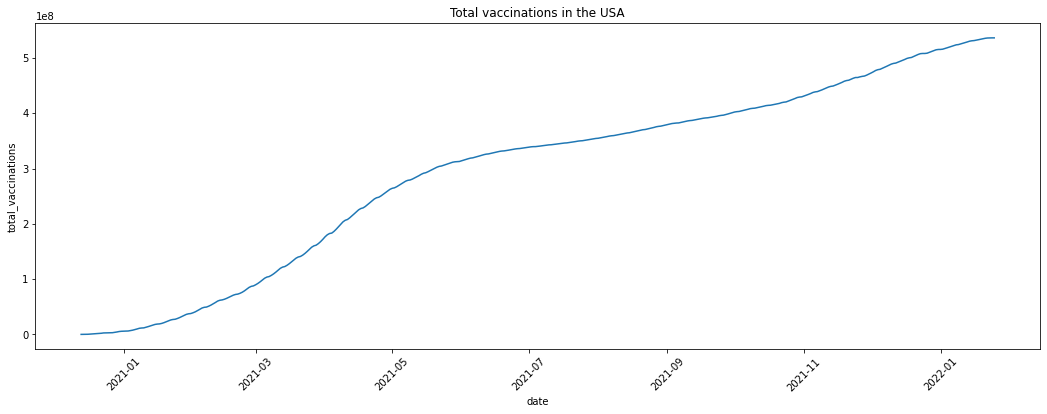

In [17]:
#Plot total vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="total_vaccinations")
plt.title("Total vaccinations in the USA")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in the USA')

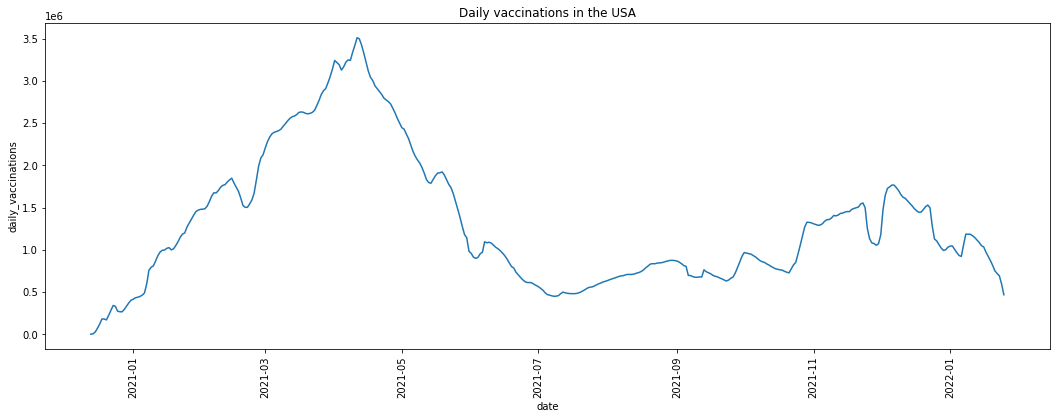

In [18]:
#Plot daily vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in the USA")

**India**

In [19]:
#Save USA data into a separate dataframe
df_India = df[df["iso_code"] == 'IND'].copy()
df_India

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
29902,India,IND,2021-01-15,0.000000e+00,0.0,0.0,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
29903,India,IND,2021-01-16,1.911810e+05,191181.0,191181.0,0.01,"Covaxin, Oxford/AstraZeneca, Sputnik V"
29904,India,IND,2021-01-17,2.243010e+05,224301.0,112150.0,0.02,"Covaxin, Oxford/AstraZeneca, Sputnik V"
29905,India,IND,2021-01-18,4.540490e+05,454049.0,151350.0,0.03,"Covaxin, Oxford/AstraZeneca, Sputnik V"
29906,India,IND,2021-01-19,6.748350e+05,674835.0,168709.0,0.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"
...,...,...,...,...,...,...,...,...
30273,India,IND,2022-01-21,1.609613e+09,925500152.0,7590638.0,115.52,"Covaxin, Oxford/AstraZeneca, Sputnik V"
30274,India,IND,2022-01-22,1.617088e+09,928133309.0,7349937.0,116.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"
30275,India,IND,2022-01-23,1.622211e+09,929971622.0,7359274.0,116.42,"Covaxin, Oxford/AstraZeneca, Sputnik V"
30276,India,IND,2022-01-24,1.623420e+09,930359898.0,6793794.0,116.51,"Covaxin, Oxford/AstraZeneca, Sputnik V"


In [20]:
#Drop the dates with missing values, previously NaN that we filled with 0. 
df_India.drop(df_India.index[df_India['total_vaccinations'] == 0], inplace = True)

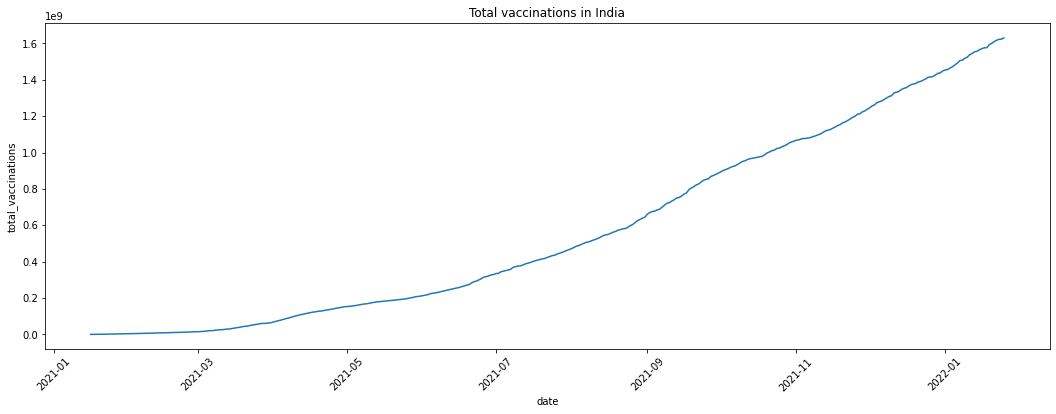

In [21]:
#Plot total vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="total_vaccinations")
plt.title("Total vaccinations in India")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in India')

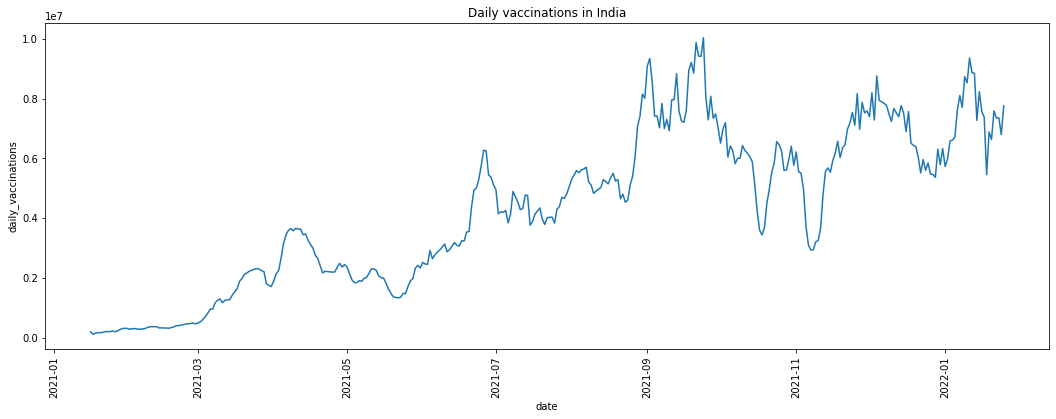

In [22]:
#Plot daily vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in India")

Top 10 countries with highest amount of vaccinated people per 100 of the population.(First sorted by total vaccinations deployed to make sure the data is not skewed by small countires with low populations)

In [23]:
#Group by total vaccinations given by country and sort descending to identify the top 10 countries. 
vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
vacc_by_country = vacc_by_country.iloc[:10]
vacc_by_country


,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-01-25,2.978646e+09,1.265034e+09,22424286.0,206.25,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-01-25,1.630312e+09,9.326065e+08,10037995.0,117.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-01-25,5.363478e+08,2.512897e+08,3510198.0,161.55,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-01-25,3.559872e+08,1.685465e+08,1941268.0,166.35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-01-25,3.071309e+08,1.820240e+08,1897011.0,111.13,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
Japan,JPN,2022-01-25,2.039353e+08,1.013634e+08,1997542.0,161.79,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Vietnam,VNM,2022-01-23,1.764293e+08,7.889469e+07,1675471.0,179.72,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Pakistan,PAK,2022-01-24,1.728360e+08,1.038058e+08,1394785.0,76.75,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Germany,DEU,2022-01-24,1.625391e+08,6.279404e+07,1125617.0,193.73,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [24]:
#Now sort by total vaccinations per 100
vacc_by_country = vacc_by_country.sort_values('total_vaccinations_per_hundred', ascending=False)
vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-01-25,2.978646e+09,1.265034e+09,22424286.0,206.25,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
Germany,DEU,2022-01-24,1.625391e+08,6.279404e+07,1125617.0,193.73,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Vietnam,VNM,2022-01-23,1.764293e+08,7.889469e+07,1675471.0,179.72,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Brazil,BRA,2022-01-25,3.559872e+08,1.685465e+08,1941268.0,166.35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Japan,JPN,2022-01-25,2.039353e+08,1.013634e+08,1997542.0,161.79,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
United States,USA,2022-01-25,5.363478e+08,2.512897e+08,3510198.0,161.55,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Mexico,MEX,2022-01-25,1.614669e+08,8.334976e+07,1648223.0,123.96,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
India,IND,2022-01-25,1.630312e+09,9.326065e+08,10037995.0,117.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
Indonesia,IDN,2022-01-25,3.071309e+08,1.820240e+08,1897011.0,111.13,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."


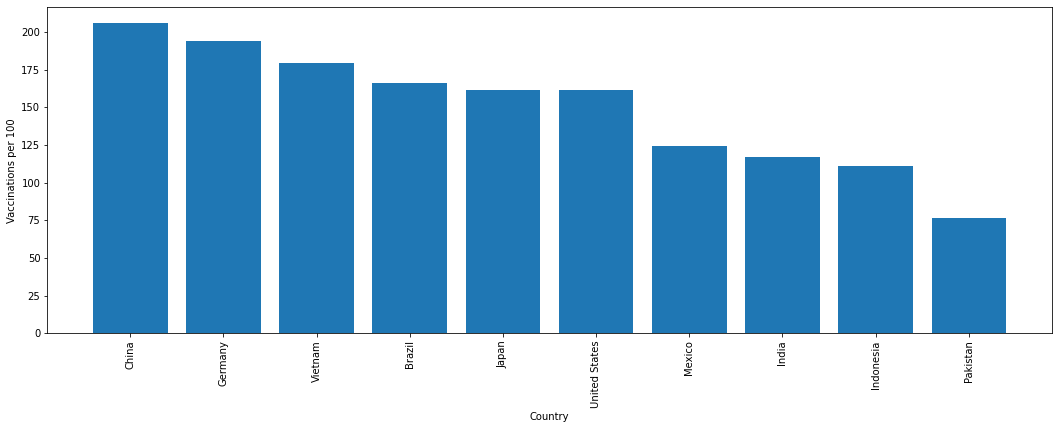

In [25]:
plt.figure(figsize=(18, 6))
plt.bar(vacc_by_country.index, vacc_by_country.total_vaccinations_per_hundred)

plt.xticks(rotation = 90)
plt.ylabel('Vaccinations per 100')
plt.xlabel('Country')
plt.show()

Country with most vaccinated people. Obviously, this will be skewed towards highest populated countries that effectively depoyed vaccinations to bulk of its population. 

In [26]:
total_vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
total_vacc_by_country = total_vacc_by_country.iloc[:10]
total_vacc_by_country


,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-01-25,2.978646e+09,1.265034e+09,22424286.0,206.25,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-01-25,1.630312e+09,9.326065e+08,10037995.0,117.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-01-25,5.363478e+08,2.512897e+08,3510198.0,161.55,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-01-25,3.559872e+08,1.685465e+08,1941268.0,166.35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-01-25,3.071309e+08,1.820240e+08,1897011.0,111.13,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
Japan,JPN,2022-01-25,2.039353e+08,1.013634e+08,1997542.0,161.79,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Vietnam,VNM,2022-01-23,1.764293e+08,7.889469e+07,1675471.0,179.72,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Pakistan,PAK,2022-01-24,1.728360e+08,1.038058e+08,1394785.0,76.75,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Germany,DEU,2022-01-24,1.625391e+08,6.279404e+07,1125617.0,193.73,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


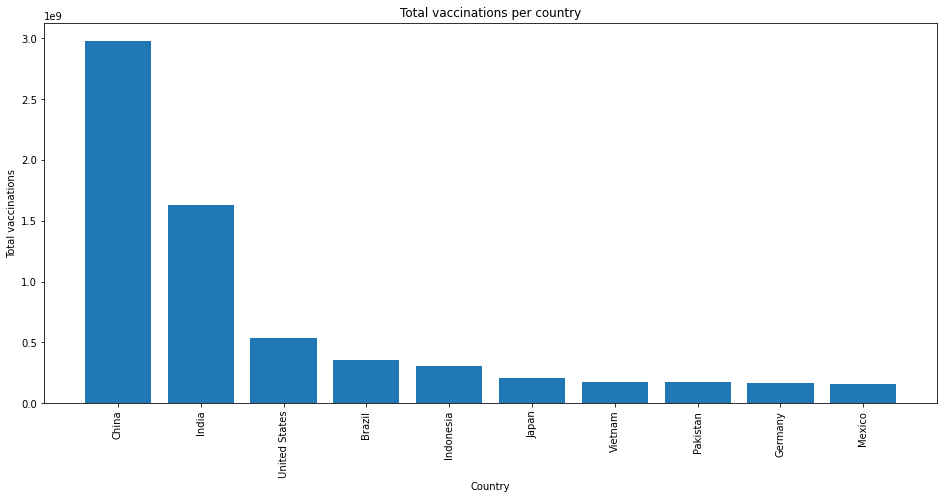

In [27]:

plt.figure(figsize=(16, 7))
plt.bar(total_vacc_by_country.index, total_vacc_by_country.total_vaccinations)

plt.title('Total vaccinations per country')
plt.xticks(rotation = 90)
plt.ylabel('Total vaccinations')
plt.xlabel('Country')
plt.show()

In [28]:
#Sort by total vaccinations delivered by countries and group by vaccines. 
vacc_names_by_country = df.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vacc_names_by_country.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-01-25,2.978646e+09,1.265034e+09,22424286.0,206.25
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-01-25,1.630312e+09,9.326065e+08,10037995.0,117.00
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-01-25,5.363478e+08,2.512897e+08,3510198.0,224.01
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-01-25,3.559872e+08,1.685465e+08,1941268.0,166.35
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-01-25,3.071309e+08,1.820240e+08,1897011.0,111.13


In [29]:
#Get the top 10 vaccines by country for easy plotting
vacc_names_by_country = vacc_names_by_country.iloc[:10]
vacc_names_by_country

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-01-25,2.978646e+09,1.265034e+09,22424286.0,206.25
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-01-25,1.630312e+09,9.326065e+08,10037995.0,117.00
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-01-25,5.363478e+08,2.512897e+08,3510198.0,224.01
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-01-25,3.559872e+08,1.685465e+08,1941268.0,166.35
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-01-25,3.071309e+08,1.820240e+08,1897011.0,111.13
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-01-25,2.039353e+08,1.013634e+08,1997542.0,229.93
"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",Vietnam,VNM,2022-01-23,1.764293e+08,7.889469e+07,1675471.0,179.72
"CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V",Pakistan,PAK,2022-01-24,1.728360e+08,1.038058e+08,1394785.0,76.75
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Spain,SVN,2022-01-25,1.625391e+08,6.279404e+07,1125617.0,232.16


In [30]:
#Reset index to move vaccines from being index to a column. 
#This makes it easy for us to plot using Seaborn, especially if we want to sort by country. 
vacc_names_by_country=vacc_names_by_country.reset_index()
vacc_names_by_country

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2022-01-25,2.978646e+09,1.265034e+09,22424286.0,206.25
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-01-25,1.630312e+09,9.326065e+08,10037995.0,117.00
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-01-25,5.363478e+08,2.512897e+08,3510198.0,224.01
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2022-01-25,3.559872e+08,1.685465e+08,1941268.0,166.35
4,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Indonesia,IDN,2022-01-25,3.071309e+08,1.820240e+08,1897011.0,111.13
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-01-25,2.039353e+08,1.013634e+08,1997542.0,229.93
6,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",Vietnam,VNM,2022-01-23,1.764293e+08,7.889469e+07,1675471.0,179.72
7,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2022-01-24,1.728360e+08,1.038058e+08,1394785.0,76.75
8,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Spain,SVN,2022-01-25,1.625391e+08,6.279404e+07,1125617.0,232.16
9,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2022-01-25,1.614669e+08,8.334976e+07,1648223.0,123.96


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

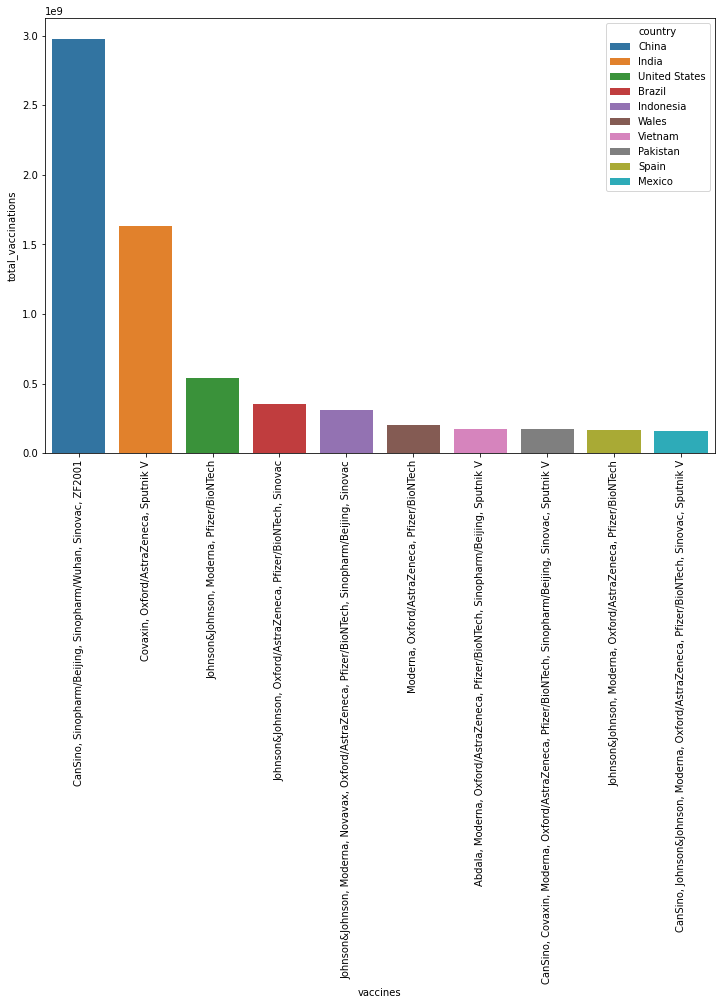

In [31]:
plt.figure(figsize=(12,8))

sns.barplot(data = vacc_names_by_country, x='vaccines', y = 'total_vaccinations', hue = 'country', dodge=False)
plt.xticks(rotation=90)

Total vaccinations per hundred, by Country on a map. 

Warning: This can make your browser very slow. 

In [32]:
fig = px.choropleth(df.reset_index(), locations="iso_code",
                    color="total_vaccinations_per_hundred",
                    color_continuous_scale=px.colors.sequential.Electric,
                   title= "Total vaccinations per 100")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})  #No margin on left, right, top and bottom
fig.show()